# Переобучение в классических ML алгоритмах

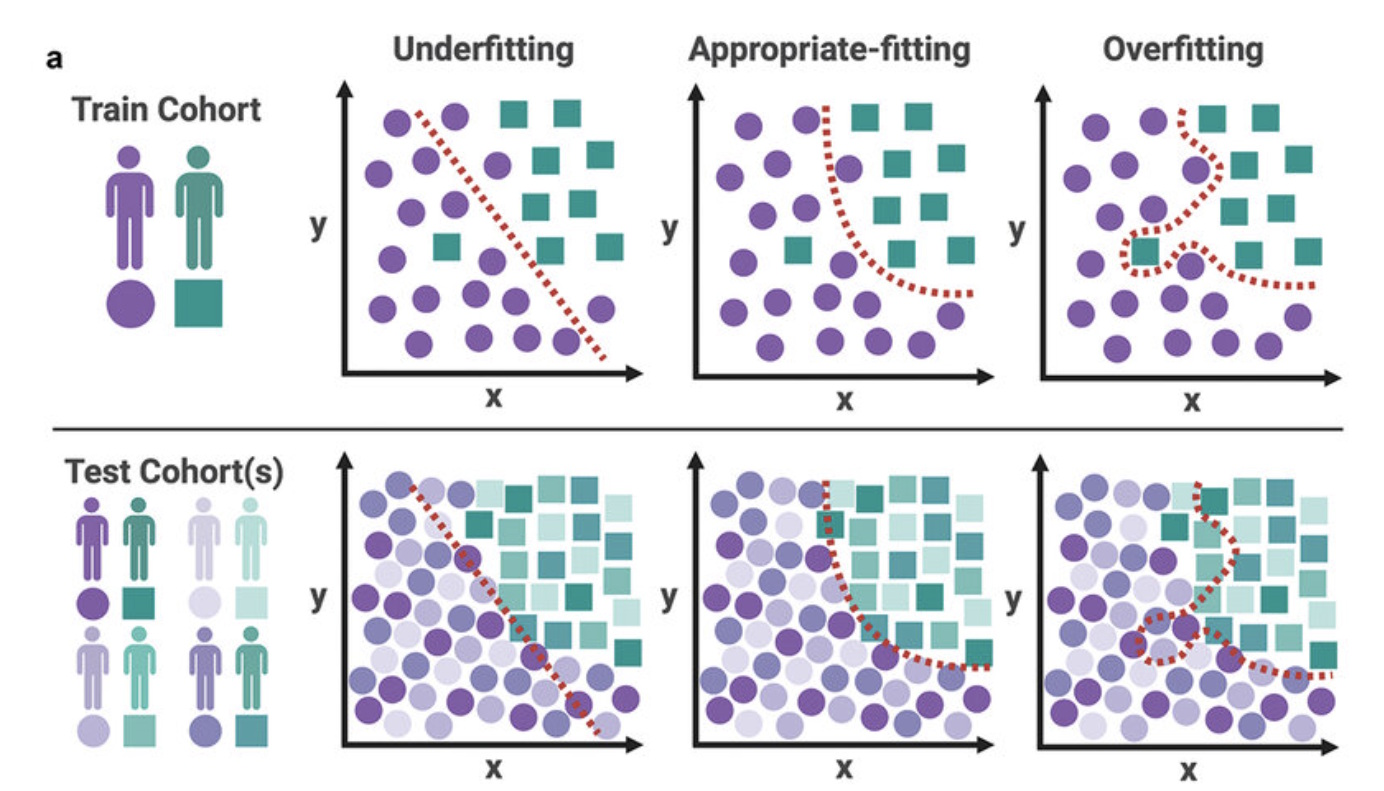

In [1]:
from IPython.display import Image
Image("figure.jpg")

In [2]:
from random import choices
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.pipeline import Pipeline


# 1. Загрузка, оценка, обработка данных

In [3]:

df = pd.read_csv('data/data.csv')
df.columns = ['id', 'diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension',
              'radius_SE', 'texture_SE', 'perimeter_SE', 'area_SE', 'smoothness_SE', 'compactness_SE', 'concavity_SE', 'concave_points_SE', 'symmetry_SE', 'fractal_dimension_SE',
              'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
              'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [4]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:

columns_to_drop = ['id']
df.drop(columns_to_drop, axis = 1, inplace=True)

In [7]:
def evaluate_model(y_true, y_prediction, model_name):
    # Матрица ошибок
    conf_matrix = confusion_matrix(y_true, y_prediction)
    # Тепловая карта матрицы ошибок
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(model_name)
    plt.show()

    # Базовые метрики
    print(f'Accuracy score: {round(accuracy_score(y_true, y_prediction),3)}')

In [8]:
def normalization(data):
    columns = data.columns
    scaler = StandardScaler()
    scaler.fit(data)
    data = pd.DataFrame(scaler.transform(data), columns = columns)
    return data

In [9]:
y = df['diagnosis']
df_ = df.drop(['diagnosis'], axis = 1)
X = df_
column_names = X.columns

# Разбиение и нормализация выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

_, X_train_reduced, _, y_train_reduced = train_test_split(
    X_train, y_train, test_size=0.03, random_state=42)
X_train_reduced.shape

(12, 30)

# Полные данные

In [10]:
X_train = normalization(X_train)
X_train_reduced = normalization(X_train_reduced)
X_test = normalization(X_test)

In [11]:
model = LogisticRegression(random_state=42,C=1,
                                 penalty='elasticnet',solver='saga',l1_ratio=0.5, max_iter=1000)
model.fit(X_train, y_train)
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)
X_train_pred
model_pred_train_acc = accuracy_score(X_train_pred, y_train)
model_pred_test_acc =  accuracy_score(X_test_pred, y_test)
print(f'Точность на тренировочной выборке {round(model_pred_train_acc, 3)}; Точность на тестовой выборке {round(model_pred_test_acc,3)}')

Точность на тренировочной выборке 0.987; Точность на тестовой выборке 0.989


In [12]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)
model_pred_train_acc = accuracy_score(X_train_pred, y_train)
model_pred_test_acc =  accuracy_score(X_test_pred, y_test)
print(f'Точность на тренировочной выборке {round(model_pred_train_acc, 3)}; Точность на тестовой выборке {round(model_pred_test_acc,3)}')

Точность на тренировочной выборке 1.0; Точность на тестовой выборке 0.91


# Недостаточное количество данных

In [13]:
model = LogisticRegression(random_state=42,C=1,
                                 penalty='elasticnet',solver='saga',l1_ratio=0.5, max_iter=1000)
model.fit(X_train_reduced, y_train_reduced)
X_train_pred = model.predict(X_train_reduced)
X_test_pred = model.predict(X_test)
model_pred_train_acc = accuracy_score(X_train_pred, y_train_reduced)
model_pred_test_acc =  accuracy_score(X_test_pred, y_test)
print(f'Точность на тренировочной выборке {round(model_pred_train_acc, 3)}; Точность на тестовой выборке {round(model_pred_test_acc,3)}')

Точность на тренировочной выборке 1.0; Точность на тестовой выборке 0.755


In [14]:
y_train_rand = pd.Series(choices(list(y_train), k= y_train.size))

In [15]:
model = tree.DecisionTreeClassifier()
model.fit(X_train_reduced, y_train_reduced)
X_train_pred = model.predict(X_train_reduced)
X_test_pred = model.predict(X_test)
model_pred_train_acc = accuracy_score(X_train_pred, y_train_reduced)
model_pred_test_acc =  accuracy_score(X_test_pred, y_test)
print(f'Точность на тренировочной выборке {round(model_pred_train_acc, 3)}; Точность на тестовой выборке {round(model_pred_test_acc,3)}')

Точность на тренировочной выборке 1.0; Точность на тестовой выборке 0.713


# Случайные целевые переменные при обучении 

In [16]:
model = LogisticRegression(random_state=42,C=1,
                                 penalty='elasticnet',solver='saga',l1_ratio=0.5, max_iter=1000)
model.fit(X_train, y_train_rand)
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)
model_pred_train_acc = accuracy_score(X_train_pred, y_train_rand)
model_pred_test_acc =  accuracy_score(X_test_pred, y_test)
print(f'Точность на тренировочной выборке {round(model_pred_train_acc, 3)}; Точность на тестовой выборке {round(model_pred_test_acc,3)}')

Точность на тренировочной выборке 0.664; Точность на тестовой выборке 0.564


In [17]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train_rand)
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)
model_pred_train_acc = accuracy_score(X_train_pred, y_train_rand)
model_pred_test_acc =  accuracy_score(X_test_pred, y_test)
print(f'Точность на тренировочной выборке {round(model_pred_train_acc, 3)}; Точность на тестовой выборке {round(model_pred_test_acc,3)}')

Точность на тренировочной выборке 1.0; Точность на тестовой выборке 0.495
